In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [5]:
print(df['Gender'].value_counts())
print(df['MaritalStatus'].value_counts())
print(df['TypeofContact'].value_counts())

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64


### Replacing duplicated comuns 

In [6]:
df['Gender']=df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [7]:
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [8]:
percent=(df.isnull().sum() / len(df['CustomerID']))*100
print(percent)
print(percent.index)

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64
Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'Num

### Storing nan columns

In [9]:
nan_values=[]
for i in percent.index:
    if percent[i]!=0:
        nan_values.append(i)
print(nan_values)

['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']


### Visualizing data distribution

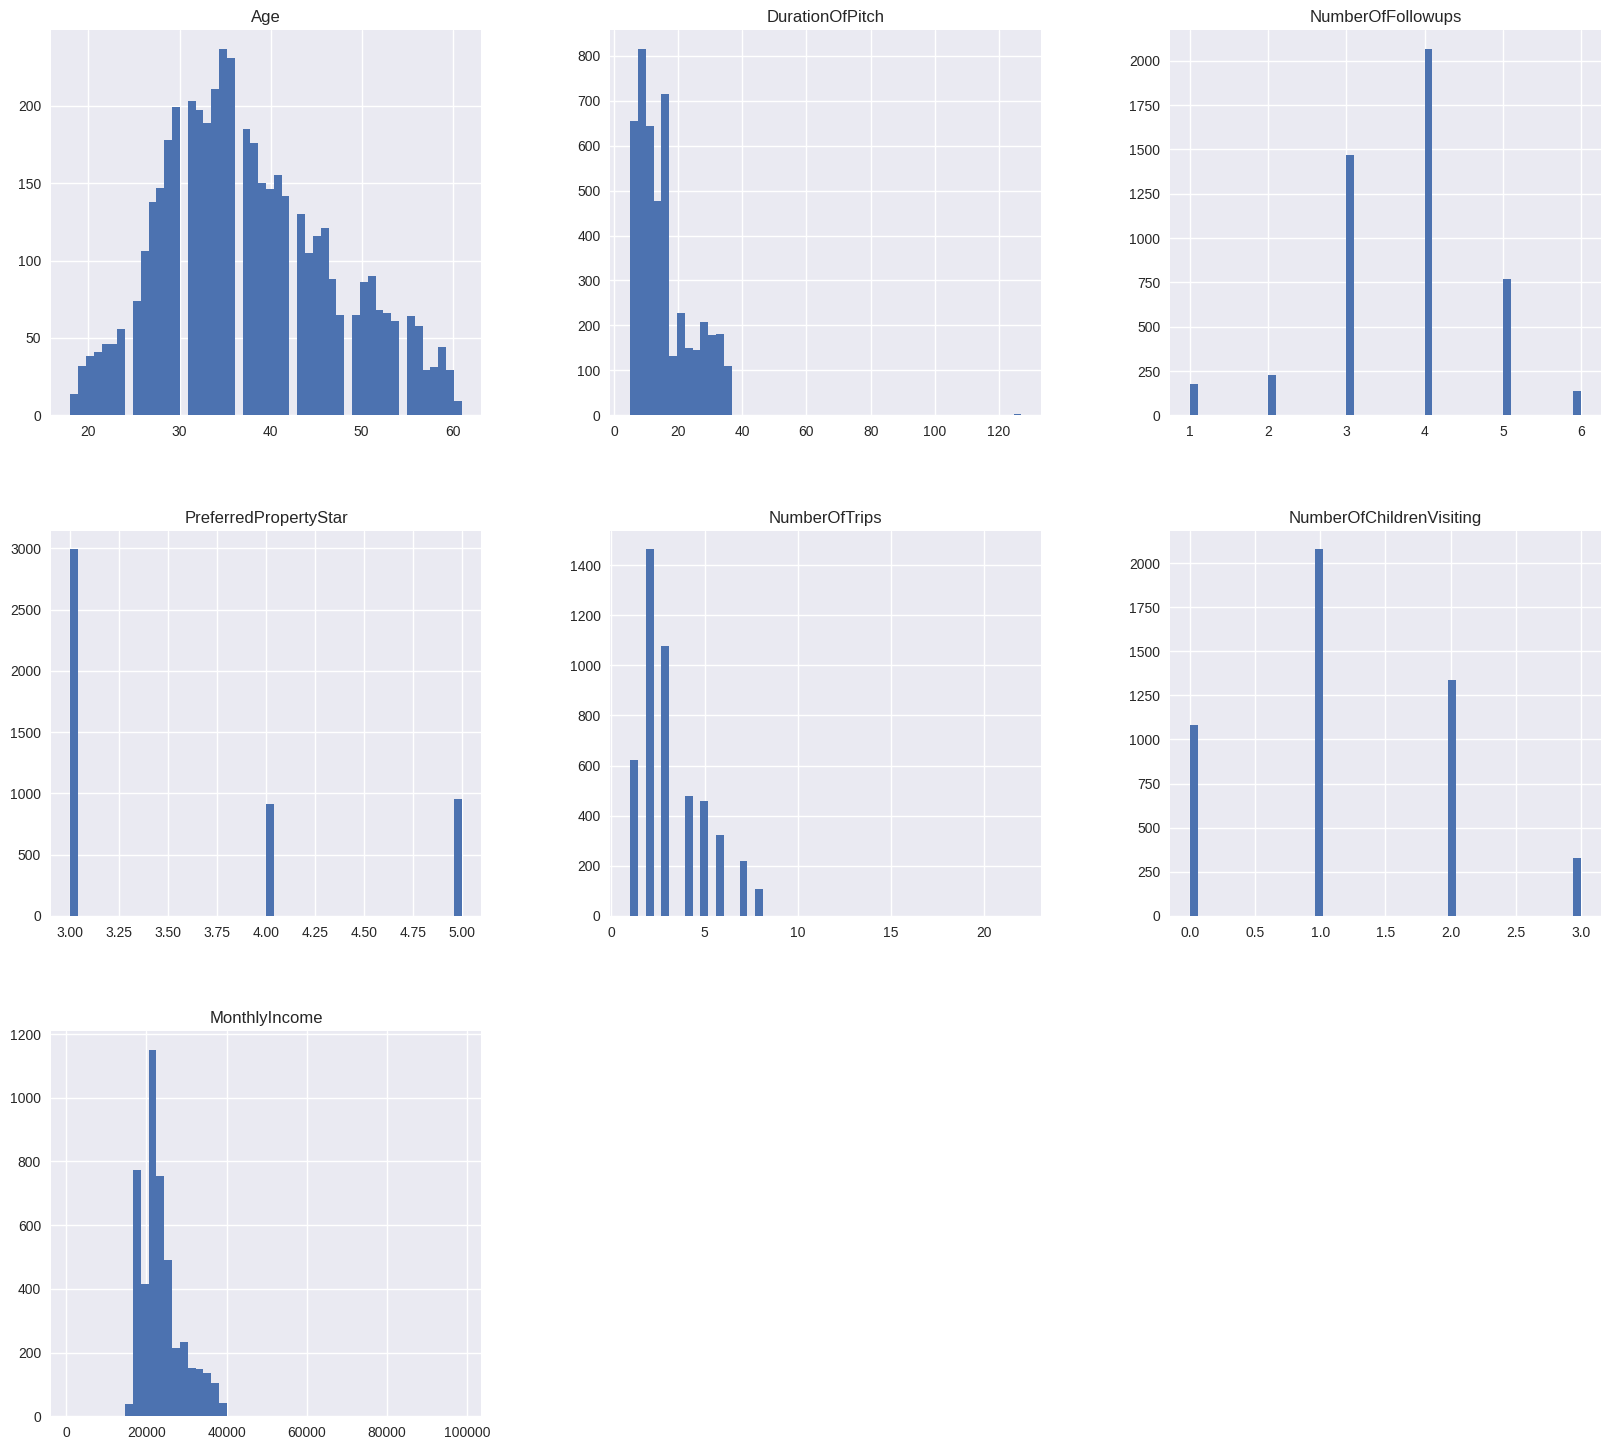

In [10]:
plt.style.use("seaborn-v0_8")
df[nan_values].hist(bins=50, figsize=(20,18))
plt.show()

In [11]:
df[nan_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4662 non-null   float64
 1   TypeofContact             4863 non-null   object 
 2   DurationOfPitch           4637 non-null   float64
 3   NumberOfFollowups         4843 non-null   float64
 4   PreferredPropertyStar     4862 non-null   float64
 5   NumberOfTrips             4748 non-null   float64
 6   NumberOfChildrenVisiting  4822 non-null   float64
 7   MonthlyIncome             4655 non-null   float64
dtypes: float64(7), object(1)
memory usage: 305.6+ KB


### Completing nan values

In [12]:
df.Age.fillna(df.Age.mean(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True) #fulfill the nan values with the mode
df.DurationOfPitch.fillna(df.DurationOfPitch.mode()[0],inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.mean(),inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [13]:
print((df.isnull().sum() / len(df['CustomerID']))*100)

CustomerID                  0.0
ProdTaken                   0.0
Age                         0.0
TypeofContact               0.0
CityTier                    0.0
DurationOfPitch             0.0
Occupation                  0.0
Gender                      0.0
NumberOfPersonVisiting      0.0
NumberOfFollowups           0.0
ProductPitched              0.0
PreferredPropertyStar       0.0
MaritalStatus               0.0
NumberOfTrips               0.0
Passport                    0.0
PitchSatisfactionScore      0.0
OwnCar                      0.0
NumberOfChildrenVisiting    0.0
Designation                 0.0
MonthlyIncome               0.0
dtype: float64


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

### Dropping CustomerID, which does not aggregate important information

In [15]:
df.drop('CustomerID',axis=1,inplace=True)

### Creating new column for feature

In [16]:
df['TotalVisting'] = df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

### Number of features by type

In [17]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numeric Features: ',len(num_features))

cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Numeric Features: ',len(cat_features))

Num of Numeric Features:  12
Num of Numeric Features:  6


### Separating the data into independent and dependent features

In [18]:
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

### Starting OneHotEncoding for categorical features and StandardScaler for numeric features

In [20]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [21]:
cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns
num_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')
preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',num_transformer,num_features)
    ]
)

### Applying Transformation in training (fit_transform)

In [22]:
X_train=preprocessor.fit_transform(X_train)
X_train=pd.DataFrame(X_train)
print(X_train.head())

    0    1    2    3    4    5    6    7    8    9   ...        16        17  \
0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ... -0.711953 -0.747741   
1  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ... -0.711953  0.680586   
2  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  ... -0.711953 -0.747741   
3  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ... -0.711953 -0.985796   
4  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  ... -0.711953  0.323505   

         18        19        20        21        22        23        24  \
0 -0.713603  0.530883  0.430533 -0.644305  0.678514  0.784667 -0.226963   
1  0.293685 -0.727912 -0.685581 -0.644305 -1.518275  0.784667  0.369702   
2  0.293685  0.530883 -0.685581 -0.644305  1.410777  0.784667 -0.265800   
3 -1.720892 -0.727912 -0.685581 -0.644305 -0.053749  0.784667  0.010892   
4  1.300974  1.789679  0.430533  1.552061  1.410777  0.784667  0.973903   

         25  
0 -1.496955  
1 -0.080598  
2  0.627580  
3  2.043937 

### Applying Transformation in testing (transform)

In [23]:
X_test=preprocessor.transform(X_test)
X_test=pd.DataFrame(X_test)

## Training The Models

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay, precision_score, \
                            recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier()
}

In [26]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training Set')
    print(f"- Accuracy: {model_train_accuracy:.4f}")
    print(f"- F1 score: {model_train_f1:.4f}")
    
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall: {model_train_recall:.4f}")
    print(f"- Roc Auc score: {model_train_rocauc_score:.4f}")
    
    
    print('----------------------------------')
    
    print('Model Performance for Test Set')
    print(f"- Accuracy: {model_test_accuracy:.4f}")
    print(f"- F1 score: {model_test_f1:.4f}")
    
    print(f"- Precision: {model_test_precision:.4f}")
    print(f"- Recall: {model_test_recall:.4f}")
    print(f"- Roc Auc score: {model_test_rocauc_score:.4f}")
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training Set
- Accuracy: 0.8460
- F1 score: 0.8242
- Precision: 0.7105
- Recall: 0.3491
- Roc Auc score: 0.6574
----------------------------------
Model Performance for Test Set
- Accuracy: 0.8487
- F1 score: 0.8287
- Precision: 0.5765
- Recall: 0.3043
- Roc Auc score: 0.6301


Decision Tree
Model performance for Training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc score: 1.0000
----------------------------------
Model Performance for Test Set
- Accuracy: 0.9121
- F1 score: 0.9139
- Precision: 0.7095
- Recall: 0.7888
- Roc Auc score: 0.8626


Random Forest
Model performance for Training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc score: 1.0000
----------------------------------
Model Performance for Test Set
- Accuracy: 0.9274
- F1 score: 0.9208
- Precision: 0.9327
- Recall: 0.6025
- Roc Auc score: 0.7970




1. Random Forest got the best accuracy

## Hyperparameter Tuning

In [ ]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
            "max_features": [5, 7, "sqrt", 8],
            "min_samples_split": [2, 8, 15, 20],
            "n_estimators": [100, 200, 500, 1000]}

In [ ]:
randomcv_models = [
                    ("RF", RandomForestClassifier(), rf_params)
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model_parm={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              )
    random.fit(X_train,y_train)
    model_parm[name]=random.best_params_

In [27]:
for model_name in model_parm:
    print(f"----------------- Best Params for {model_name} -----------------")
    print(model_parm[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=500; total time=   2.6s
[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=500; total time=   2.5s
[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=500; total time=   2.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=5, min_samples_split=20, n_estimators=500; total time=   2.0s
[CV] END max_depth=10, max_features=5, min_samples_split=20, n_estimators=500; total time=   2.0s
[CV] END max_depth=10, max_features=5, min_samples_split=20, n_estimators=500; total time=   2.0s
[CV] END max_depth=None, max_features=8, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, max_features=8, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, max_features=8, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=8, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=8, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=8, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=5, min_samples_split=8, n_estimators=500; total time=   2.1s
[CV] END max_depth=10, max_features=5, min_samples_split=8, n_estimators=500; total time=   2.1s
[CV] END max_depth=10, max_features=5, min_samples_split=8, n_estimators=500; total time=   2.1s
[CV] END max_depth=15, max_features=7, min_samples_split=8, n_estimators=1000; total time=   5.2s
[CV] END max_depth=15, max_features=7, min_samples_split=8, n_estimators=1000; total time=   5.0s
[CV] END max_depth=15, max_features=7, min_samples_split=8, n_estimators=1000; total time=   5.4s
[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.0s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=1000; total time=   3.6s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=1000; total time=   3.6s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=1000; total time=   3.6s
[CV] END max_depth=5, max_features=8, min_samples_split=8, n_estimators=1000; total time=   3.8s
[CV] END max_depth=5, max_features=8, min_samples_split=8, n_estimators=1000; total time=   3.9s
[CV] END max_depth=5, max_features=8, min_samples_split=8, n_estimators=1000; total time=   3.8s
[CV] END max_depth=5, max_features=8, min_samples_split=20, n_estimators=1000; total time=   3.7s
[CV] END max_depth=5, max_features=8, min_samples_split=20, n_estimators=1000; total time=   3.8s
[CV] END max_depth=5, max_features=8, min_samples_split=20, n_estimators=1000; total time=   3.7s
[CV] END max_depth=15, ma

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=1000; total time=   3.6s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=1000; total time=   3.6s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=1000; total time=   3.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=200; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=500; total time=   1.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=200; total time=   1.0s
[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=200; total time=   1.0s
[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   4.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   4.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   4.7s
[CV] END max_depth=8, max_features=7, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=8, max_features=7, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=8, max_features=7, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] E

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=500; total time=   1.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=500; total time=   1.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=8, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, max_features=8, min_samples_split=15, n_estimators=200; total time=   0.8s
[CV] END max_depth=5, max_features=8, min_samples_split=15, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=1000; total time=   4.4s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=1000; total time=   4.5s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=1000; total time=   4.5s
[CV] END max_depth=5, 

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, max_features=8, min_samples_split=15, n_estimators=500; total time=   2.6s
[CV] END max_depth=None, max_features=8, min_samples_split=15, n_estimators=500; total time=   2.6s
[CV] END max_depth=None, max_features=8, min_samples_split=15, n_estimators=500; total time=   2.6s
[CV] END max_depth=None, max_features=8, min_samples_split=8, n_estimators=500; total time=   2.7s
[CV] END max_depth=None, max_features=8, min_samples_split=8, n_estimators=500; total time=   2.7s
[CV] END max_depth=None, max_features=8, min_samples_split=8, n_estimators=500; total time=   2.7s
[CV] END max_depth=10, max_features=8, min_samples_split=15, n_estimators=500; total time=   2.5s
[CV] END max_depth=10, max_features=8, min_samples_split=15, n_estimators=500; total time=   2.5s
[CV] END max_depth=10, max_features=8, min_samples_split=15, n_estimators=500; total time=   2.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=500; total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=500; total time=   2.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=1000; total time=   3.3s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=1000; total time=   4.2s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=1000; total time=   4.1s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=1000; total time=   4.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=500; total time=   1.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=500; total time=   1.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=500; total time=   1.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500; total time=   2.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500; total time=   2.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500; total time=   2.2s
[CV] END max_depth=15, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=500; total time=   2.4s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=500; total time=   2.3s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=500; total time=   2.4s
[CV] END max_depth

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.3s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=1000; total time=   5.4s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=1000; total time=   5.3s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=1000; total time=   5.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=1000; total time=   5.1s
[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=1000; total time=   5.0s
[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=1000; total time=   5.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=1000; total time=   4.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=1000; total time=   4.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=1000; total time=   4.2s
[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=500; total time=   1.9s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=500; total time=   1.9s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=500; total time=   1.9s
[CV] END max_depth=Non

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=1000; total time=   5.4s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=1000; total time=   5.2s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=1000; total time=   5.3s
[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=1000; total time=   4.3s
[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=1000; total time=   4.2s
[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=1000; total time=   4.3s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=200; total time=   1.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   4.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   3.9s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=500; total time=   1.9s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=500; total time=   1.9s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=500; total time=   1.9s
----------------- Best Params for RF -----------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}


## Training RandomForest with tuned hyperparameters

In [ ]:
models={
    "Random Forest":RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 8, max_depth= 15)
}

In [28]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training Set')
    print(f"- Accuracy: {model_train_accuracy:.4f}")
    print(f"- F1 score: {model_train_f1:.4f}")
    
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall: {model_train_recall:.4f}")
    print(f"- Roc Auc score: {model_train_rocauc_score:.4f}")
    
    
    print('----------------------------------')
    
    print('Model Performance for Test Set')
    print(f"- Accuracy: {model_test_accuracy:.4f}")
    print(f"- F1 score: {model_test_f1:.4f}")
    
    print(f"- Precision: {model_test_precision:.4f}")
    print(f"- Recall: {model_test_recall:.4f}")
    print(f"- Roc Auc score: {model_test_rocauc_score:.4f}")
    
    print('='*35)
    print('\n')


Random Forest
Model performance for Training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc score: 1.0000
----------------------------------
Model Performance for Test Set
- Accuracy: 0.9427
- F1 score: 0.9394
- Precision: 0.9339
- Recall: 0.7019
- Roc Auc score: 0.8460




## Plot ROC AUC Curve

In [ ]:
plt.figure()
auc_models = [
    {
        'label':'Random Forest Classifier',
        'model':RandomForestClassifier(n_estimators= 200, min_samples_split= 2, max_features= 8, max_depth= None),
        'auc':0.8485
    }
]

In [ ]:
# Create Loop Through all Models
for algo in auc_models:
    model=algo['model']
    model.fit(X_train,y_train)
#Compute False positive rate and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

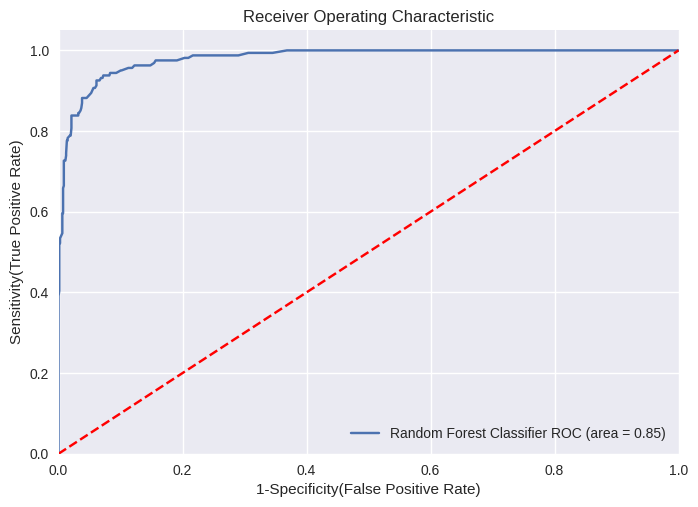

In [29]:
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 